In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve, LearningCurveDisplay
from sklearn.metrics import mean_squared_error, f1_score

from numpy import linspace, mean
import plotly.express as px

### Carregar e visualizar os dados

In [2]:
# Carregar os dados - Regressão
df = pd.read_csv('./datasets/dataset_colesterol.csv')

In [3]:
# Visualizar estrutura dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
# Visualizar Dataframe
df.head(5)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [5]:
# Ajustar DataFrame

df.drop('Id', axis=1, inplace=True)
df.dropna(inplace=True, axis=0)

# Aplicar OneHotEncoding nas variáveis categóricas
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [6]:
# DataFrame atualizado
df.head(5)

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33.0,85.1,186.0,199.63,False,False,True,False,False,True,False,True,False
1,68.0,105.0,184.0,236.98,True,False,False,False,True,False,False,False,True
2,25.0,64.8,180.0,161.79,False,False,False,True,True,False,True,False,False
3,43.0,120.2,167.0,336.24,True,False,False,False,True,False,True,False,False
4,79.0,88.5,175.0,226.23,False,True,False,False,True,False,False,True,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        981 non-null    float64
 1   Peso                         981 non-null    float64
 2   Altura                       981 non-null    float64
 3   Colesterol                   981 non-null    float64
 4   Grupo Sanguíneo_A            981 non-null    bool   
 5   Grupo Sanguíneo_AB           981 non-null    bool   
 6   Grupo Sanguíneo_B            981 non-null    bool   
 7   Grupo Sanguíneo_O            981 non-null    bool   
 8   Fumante_Não                  981 non-null    bool   
 9   Fumante_Sim                  981 non-null    bool   
 10  Nível de Atividade_Alto      981 non-null    bool   
 11  Nível de Atividade_Baixo     981 non-null    bool   
 12  Nível de Atividade_Moderado  981 non-null    bool   
dtypes: bool(9), float64(4)
me

### Treinar Modelo de Regressão Linear, visualizando a curva de aprendizado

In [8]:
# Separar X e y
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [9]:
# Criar o modelo
model_reg = LinearRegression()

In [10]:
# Gerar Scores da Curva de Aprendizado - Regressão
train_size_abs, train_scores, test_scores = learning_curve(model_reg, X, y, train_sizes=linspace(0.1, 0.9, 9), scoring='neg_mean_squared_error', cv=3)

In [11]:
# Train Scores
train_scores

array([[-47.00047262, -77.22213421, -77.22213421],
       [-55.32546672, -89.02102815, -89.02102815],
       [-61.73362968, -83.11563855, -83.11563855],
       [-66.56665384, -81.91926243, -81.91926243],
       [-65.31117543, -83.74892103, -83.74892103],
       [-64.03358554, -78.84574989, -79.82035819],
       [-66.01735276, -78.89229346, -77.37203109],
       [-67.13594664, -77.81631159, -77.31161195],
       [-70.43218552, -80.04327785, -77.59002198]])

In [12]:
# Quantidade
train_size_abs

array([ 65, 130, 196, 261, 327, 392, 457, 523, 588])

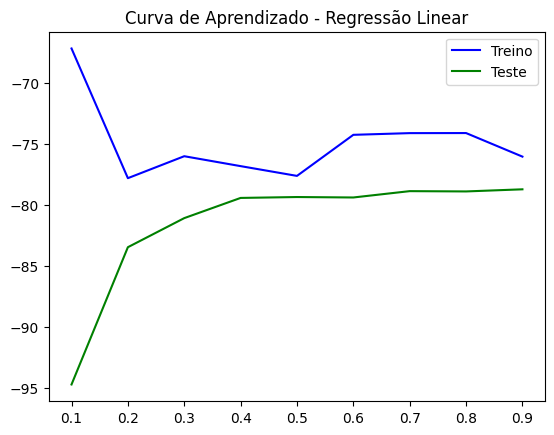

In [13]:
# Gerar Plot com Curva de Aprendizado
plt.plot(linspace(0.1, 0.9, 9), mean(train_scores, axis=1), color='b', label='Treino')
plt.plot(linspace(0.1, 0.9, 9), mean(test_scores, axis=1), color='g', label='Teste')
plt.title("Curva de Aprendizado - Regressão Linear")
plt.legend()
plt.show()